Function that computes all powers

In [1]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def get_powers(num_tps,df_list_cleaned):
    plt.rcParams['figure.figsize'] = [13, 10]
    initial_offset = 2
#     color_list = ['green','teal','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon']
#     legend_list = ['','','Modem','RFE','','','','','','','','','','Display']

    battery_power = []
    total_power = []
    modem_power = []
    display_power = []
    rfe_power = []
    all_powers = pd.DataFrame(index=range(24), columns=range(num_tps))

    for tp_idx in range(num_tps):
        df_np = np.array(df_list_cleaned[tp_idx])
        df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
        df_np[:,:,0] = df_np[:,:,0]/1e9
        sum_pwr = [0]*len(df_np[1,:,1])
#         plt.subplot(num_tps,1,tp_idx+1)
        for i in range(0,25):
            x_vals = df_np[i,:,0]
            y_vals = df_np[i,:,1]
            delta_x_vals = np.copy(x_vals)
            delta_x_vals[1:] = delta_x_vals[1:]-delta_x_vals[0:x_vals.size-1]
            delta_x_vals[0] = 0
            delta_y_vals = np.copy(y_vals)
            if (i==0) :
                delta_y_vals = 3.75*10**(-3)*(abs(y_vals[initial_offset:]))
#                 plt.plot(x_vals[initial_offset:],delta_y_vals,color = 'blue',label="Battery power consumed (mW)")
                battery_power.append(delta_y_vals)
            if (i>=1):
                delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
                delta_y_vals[0] = 0
                avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
                all_powers.iloc[i-1,tp_idx] = avg_pow_indiv
    #             print("Average Power (mW) for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
                sum_pwr = sum_pwr+delta_y_vals
            if(i==2):
                modem_power.append(delta_y_vals)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'green',label='Modem')    

            if(i==3):
                rfe_power.append(delta_y_vals)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'cyan',label='RFE')    

            if (i ==13):
                display_power.append(delta_y_vals)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'salmon',label='Display')    
#                 plt.plot([min_time,max_time],[avg_pow_indiv,avg_pow_indiv], linestyle="--", color='salmon', label = "Peak Pow: "+str(avg_pow_indiv.round(2))+ " mW")
#         print(sum_pwr)
        total_power.append(sum_pwr)
#         plt.plot(x_vals[initial_offset:],total_power[tp_idx][initial_offset:]*(4/1000),color='purple',label='Total power from OPDM')

#         plt.xlabel("Time (seconds)", fontsize=12)
#         plt.ylabel("Power (mW)", fontsize=16)
#         plt.title("Comparison of Battery consumption with total power")
#         plt.legend(fontsize=10)
#         # plt.title('Ratio vs #femto BS')
#         plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
#         plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
#         # plt.minorticks_on()

#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=14)
#         plt.ylim([0,2150])
    # print(total_power)
    airplane_battery = np.mean(battery_power[0])
    airplane_total = np.mean(total_power[0])
    pct_cell = []
    pct_battery = []
    delta_battery = []
    delta_total = []
    odpm_total = []
    delta_modem = []
    pct_p_tilda_pi = []
    disp_avg = [np.mean(display_power[0])*4/1000]
    battery_avg = [airplane_battery]
    modem_avg = [(np.mean(rfe_power[0])+np.mean(modem_power[0]))*4/1000]
    odpm_avg= [airplane_total*4/1000]
    for i in range(1,num_tps):
        pi_hat = (np.mean(rfe_power[i])+np.mean(modem_power[i]))*4/1000
        modem_avg.append(pi_hat)
        battery_avg.append(np.mean(battery_power[i]))
        pi_tilda=(np.mean(battery_power[i])-airplane_battery)
        pi = np.mean(total_power[i])*4/1000
        odpm_avg.append(pi)
        delta_battery.append(pi_tilda)
        delta_total.append((np.mean(total_power[i])-airplane_total)*4/1000)
        delta_modem.append(np.mean(modem_power[i])*4/1000)
        odpm_total.append(pi_hat)
        disp_avg.append(np.mean(display_power[i])*4/1000)
        pct_cell.append((pi_hat)/pi) #modem/total
        pct_battery.append(pi_tilda/pi_hat) #battery diff/modem
        pct_p_tilda_pi.append(pi_tilda/pi) #battery diff /total
    outputs = [delta_battery,battery_avg,modem_avg,odpm_avg,disp_avg,pct_cell,pct_battery,pct_p_tilda_pi]        
    return outputs

In [74]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialise TraceProcessor with a trace file
tp_list= []
# color_list = ['red','orange','green']
# color_list.append(['red','orange','green'])
# color_list = ['blue','cyan','springgreen','lime','teal']
color_list = ['blue','cyan','teal','red','pink','salmon']
# color_list = ['blue','cyan','teal','gold','orange','bisque','red','pink','salmon']
line_list = ['-','-','-','-','-','-','-','-','-','-','-','-','-']
enable_legend = True
# col_list = ['Airplane','Standby off','Standby mint','Airplane FullB','Iperf1M_DL','Iperf1M_UL','Youtube','Wifi_iperf_UL','5G_Iperf1M_UL']
# col_list = ['Airplane','Standby off','Standby mint','Airplane FullB','Iperf1M_DL','Iperf1M_UL','Youtube','Wifi_iperf_UL','5G_Iperf1M_UL']
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
    print(exp)
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_airplane_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_LTE_Stnd40_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_stdby_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_stdby_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_iperf1M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_iperf5M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/ul_iperf1M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/ul_iperf5M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/ul_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_iperf1M_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_WiFiYoutube_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_LTE_YT_50_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_5G_YT_50_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_WiFiiperf1M_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/instWeb_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/instApp_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_iperf5M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_iperf50M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))
# string_mapper = ["Battery charge","Battery capacity pct","Battery current","Battery avg current","Modem","RFE","mmWave","Display"]

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
#     print(outputs[0])
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])
#     print("Percentage of modem+rfe in total odpm across different modes : ",pct_cell)
#     print("Percentage of modem+rfe in battery power across different modes : ",pct_battery)

0
1
2


Plots for different modes

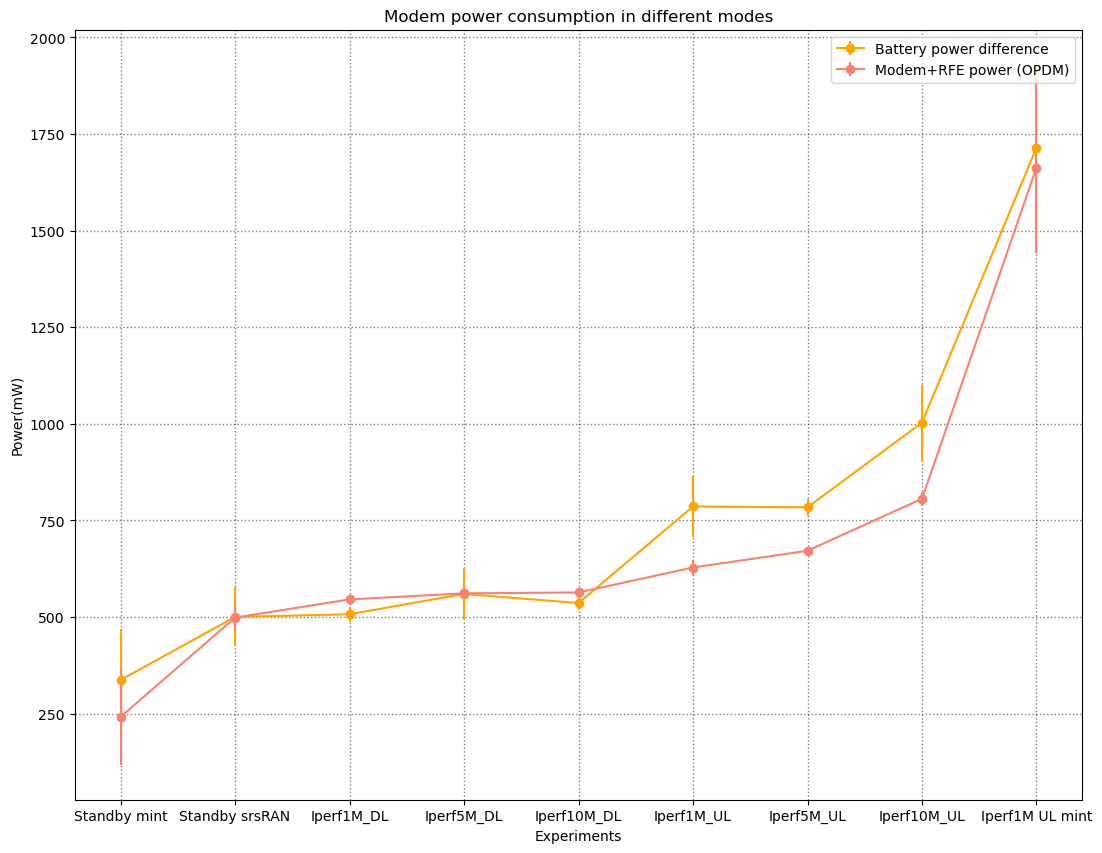

In [77]:
# col_list = ['Airplane','Standby','Standby mint','Iperf1M_DL','Iperf1M_UL','Youtube','5G_Iperf1M_UL']
# col_list = ['Airplane','Standby off','Standby mint','Airplane FullB','Iperf1M_DL','Iperf1M_UL','Youtube',
#             'Wifi_iperf_UL','5G_Iperf1M_UL','Insta Web','InstaApp']
col_list = ['Airplane','Standby mint','Standby srsRAN','Iperf1M_DL','Iperf5M_DL','Iperf10M_DL','Iperf1M_UL','Iperf5M_UL','Iperf10M_UL','Iperf1M UL mint']
# ,'Wifi Youtube','LTE Youtube','Youtube']

delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
odpm_total_avg = np.mean(np.array(odpm_total).T,1)
modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = col_list[1:]
# plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
# plt.errorbar(range(len(legend_list)),odpm_total_avg,yerr=np.std(np.array(odpm_total).T,1),color='purple',linestyle='-',marker='>',label='Total power (ODPM)')
plt.errorbar(range(len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange',linestyle='-',marker='o',label =  'Battery power difference')
# plt.errorbar(range(len(legend_list)),disp_avg[1:],yerr=np.std(np.array(display).T,1)[1:],color='lightgreen',linestyle='-',marker='>',label='Display power (ODPM)')
plt.errorbar(range(len(legend_list)),modem_avg[1:],yerr=np.std(np.array(modem).T,1)[1:],color='salmon',linestyle='-',marker='o',label = 'Modem+RFE power (OPDM)')
plt.legend()
plt.title('Modem power consumption in different modes') 
plt.xlabel('Experiments')
plt.ylabel('Power(mW)')
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

Plots for display

In [13]:
# Initialise TraceProcessor with a trace file
tp_list= []
# color_list = ['red','orange','green']
# color_list.append(['red','orange','green'])
# color_list = ['blue','cyan','springgreen','lime','teal']
color_list = ['blue','cyan','teal','red','pink','salmon']
# color_list = ['blue','cyan','teal','gold','orange','bisque','red','pink','salmon']
line_list = ['-','-','-','-','-','-','-','-','-','-','-','-','-']
enable_legend = True
col_list = ['Standby off','Standby 20%','LTE Standby','Standby 40%','Standby 60%','Standby 80%','Standby 100%']
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
    print(exp)
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_airplane_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_stdby_dispOff_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_Stnd20_2min_'+str(exp+1)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_LTE_Stnd40_2min_'+str(0)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_Stnd40_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_Stnd60_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_Stnd80_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_stdby_dispON_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])

0
1
2


In [251]:
print("Avg diff in battery powers Standby full brightness - standby no disp",battery_avg[2]-battery_avg[1])
print("Avg display power from odpm for Standby full brightness - standby no disp",disp_avg[2]-disp_avg[1])

Avg diff in battery powers Standby full brightness - standby no disp 32.14709290187898
Avg display power from odpm for Standby full brightness - standby no disp 32.50882605682608


In [14]:
def get_powers_pixel(num_tps,df_list_cleaned):
    plt.rcParams['figure.figsize'] = [13, 10]
    initial_offset = 2
#     color_list = ['green','teal','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon']
#     legend_list = ['','','Modem','RFE','','','','','','','','','','Display']

    battery_power = []
    odpm_avg = []
    battery_mean_pwr =[]
    modem_avg = []
    disp_avg = []
    rfe_avg = []
    delta_battery = []
    cell_avg = []
    all_powers = pd.DataFrame(index=range(24), columns=range(num_tps))
    pct_cell = []
    pct_battery = []
    pct_p_tilda_pi = []
    for tp_idx in range(num_tps):
        df_np = np.array(df_list_cleaned[tp_idx])
        df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
        df_np[:,:,0] = df_np[:,:,0]/1e9
        sum_pwr = [0]*len(df_np[1,:,1])
#         plt.subplot(num_tps,1,tp_idx+1)
        for i in range(0,25):
            x_vals = df_np[i,:,0]
            y_vals = df_np[i,:,1]
            delta_x_vals = np.copy(x_vals)
            delta_x_vals[1:] = delta_x_vals[1:]-delta_x_vals[0:x_vals.size-1]
            delta_x_vals[0] = 0
            delta_y_vals = np.copy(y_vals)
            if (i==0) :
                delta_y_vals = 3.75*10**(-3)*(abs(y_vals[initial_offset:]))
#                 plt.plot(x_vals[initial_offset:],delta_y_vals,color = 'blue',label="Battery power consumed (mW)")
                battery_power.append(delta_y_vals)
                battery_mean_pwr.append(np.mean(delta_y_vals))

            if (i>=1):
                delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
                delta_y_vals[0] = 0
                avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
                all_powers.iloc[i-1,tp_idx] = avg_pow_indiv
    #             print("Average Power (mW) for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
                sum_pwr = sum_pwr+delta_y_vals
            if(i==2):
                modem_avg.append(np.mean(delta_y_vals)*4/1000)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'green',label='Modem')    

            if(i==3):
                rfe_avg.append(np.mean(delta_y_vals)*4/1000)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'cyan',label='RFE')    

            if (i ==13):
                disp_avg.append(np.mean(delta_y_vals)*4/1000)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'salmon',label='Display')    
#                 plt.plot([min_time,max_time],[avg_pow_indiv,avg_pow_indiv], linestyle="--", color='salmon', label = "Peak Pow: "+str(avg_pow_indiv.round(2))+ " mW")
#         print(sum_pwr)
        odpm_avg.append(np.mean(sum_pwr)*4/1000)
        if (tp_idx >0):
            pi_hat = rfe_avg[tp_idx]+modem_avg[tp_idx]
            cell_avg.append(pi_hat)
            pi_tilda = battery_mean_pwr[tp_idx] - battery_mean_pwr[0]
            delta_battery.append(pi_tilda)
            pi = odpm_avg[tp_idx]
            pct_cell.append((pi_hat)/pi) #modem/total
            pct_battery.append(pi_tilda/pi_hat) #battery diff/modem
            pct_p_tilda_pi.append(pi_tilda/pi) #battery diff /total
    outputs = [delta_battery,battery_mean_pwr,modem_avg,rfe_avg,disp_avg,odpm_avg,pct_cell,pct_battery,pct_p_tilda_pi]        
    return outputs

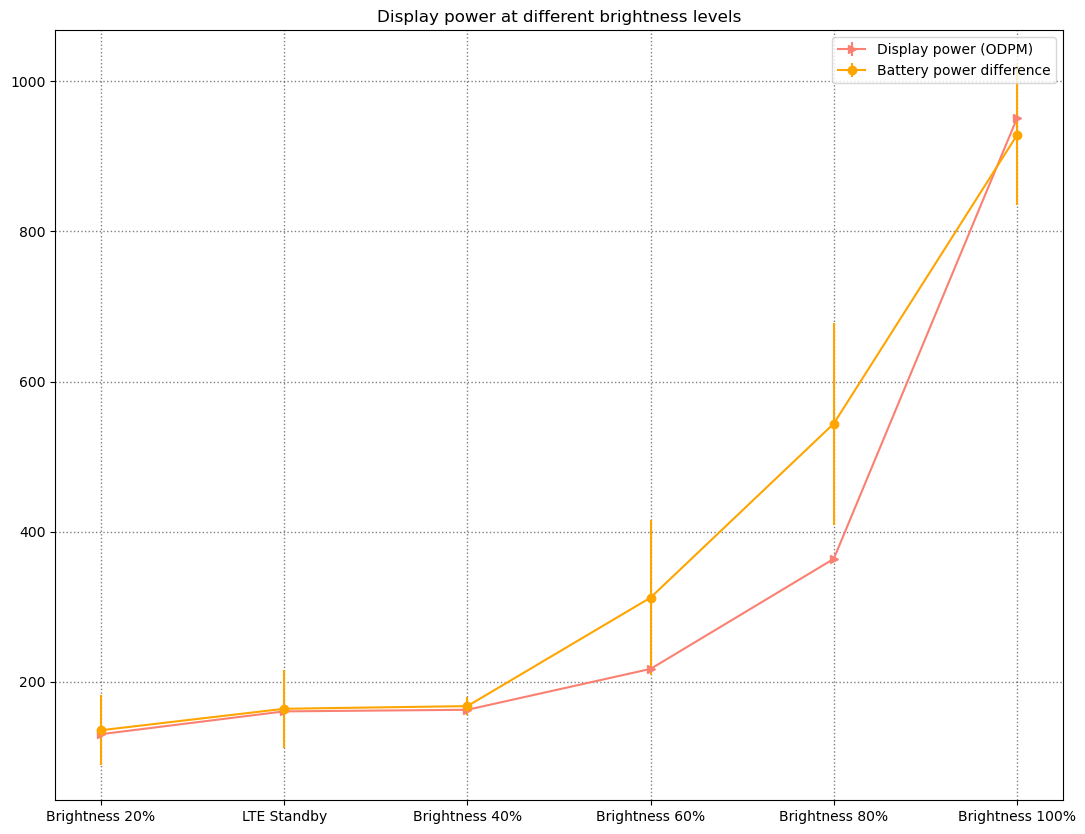

In [15]:
delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = ['Brightness 20%','LTE Standby','Brightness 40%','Brightness 60%','Brightness 80%','Brightness 100%']
plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
plt.errorbar(range(len(legend_list)),disp_avg[1:],yerr=np.std(np.array(display).T,1)[1:],color='salmon',linestyle='-',marker='>',label='Display power (ODPM)')
plt.errorbar(range(len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange',linestyle='-',marker='o',label =  'Battery power difference')
plt.legend()
plt.title('Display power at different brightness levels') 
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

Plots for 4g vs 5G

In [256]:
# Initialise TraceProcessor with a trace file
tp_list= []
# color_list = ['red','orange','green']
# color_list.append(['red','orange','green'])
# color_list = ['blue','cyan','springgreen','lime','teal']
color_list = ['blue','cyan','teal','red','pink','salmon']
# color_list = ['blue','cyan','teal','gold','orange','bisque','red','pink','salmon']
line_list = ['-','-','-','-','-','-','-','-','-','-','-','-','-']
enable_legend = True
col_list = ['Standby off','Standby 20%','LTE Standby','Standby 40%','Standby 60%','Standby 80%','Standby 100%']
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
    print(exp)
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_airp_dispOFF_2min_'+str(0)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_LTE_Stnd40_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_mint_Stnd40_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])

0
1
2


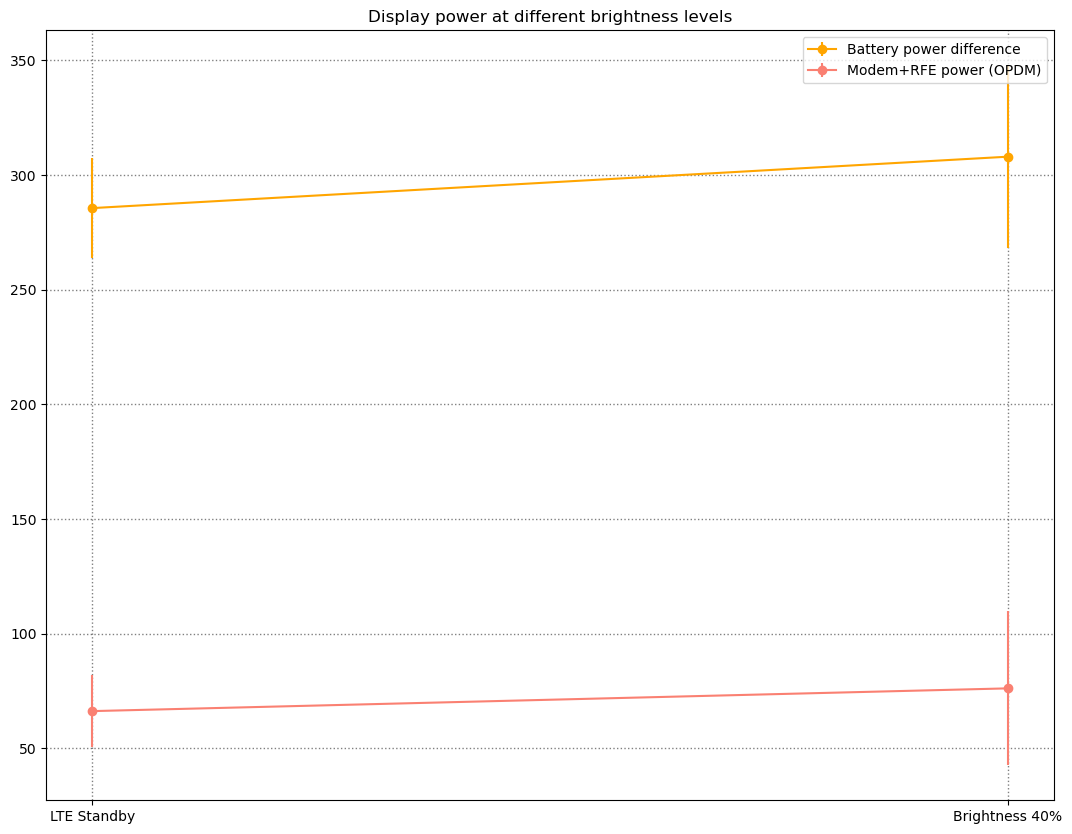

In [259]:
delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = ['LTE Standby','Brightness 40%']
plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
# plt.errorbar(range(len(legend_list)),disp_avg[1:],yerr=np.std(np.array(display).T,1)[1:],color='salmon',linestyle='-',marker='>',label='Display power (ODPM)')
plt.errorbar(range(len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange',linestyle='-',marker='o',label =  'Battery power difference')
plt.errorbar(range(len(legend_list)),modem_avg[1:],yerr=np.std(np.array(modem).T,1)[1:],color='salmon',linestyle='-',marker='o',label = 'Modem+RFE power (OPDM)')
plt.legend()
plt.title('Display power at different brightness levels') 
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

In [255]:
delta_battery_avg

array([22.42062109, 22.42062109, 22.42062109])

In [155]:
ratio_compare = pd.DataFrame(columns = ['p_tilda/pi mint','p_tilda/pi srsRAN'])
ratio_compare['p_tilda/pi mint'] = np.array(pct_p_tilda_pi).T[0]
ratio_compare['p_tilda/pi srsRAN'] = np.array(pct_p_tilda_pi).T[1]
display(ratio_compare)

,p_tilda/pi mint,p_tilda/pi srsRAN
0,0.245751,0.635015
1,0.211517,0.399344
2,0.250371,0.499500


In [123]:
delta_battery[-2:]

[[426.8173430962343,
  203.06023521370372,
  829.8886198692362,
  516.0663075313807,
  725.0668619246865,
  1356.4445802032646,
  265.5048046291525,
  1450.1578943995073,
  2432.1898901673626,
  2325.818896443514],
 [468.3717556223849,
  289.4161473773485,
  862.9816144963465,
  479.88450666841,
  735.8583298901672,
  1030.2270972729643,
  333.34306021659705,
  1976.8378514483293,
  2937.4780579236394,
  2360.6065673378653]]

ValueError: 'yerr' (shape: (11,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (2,))

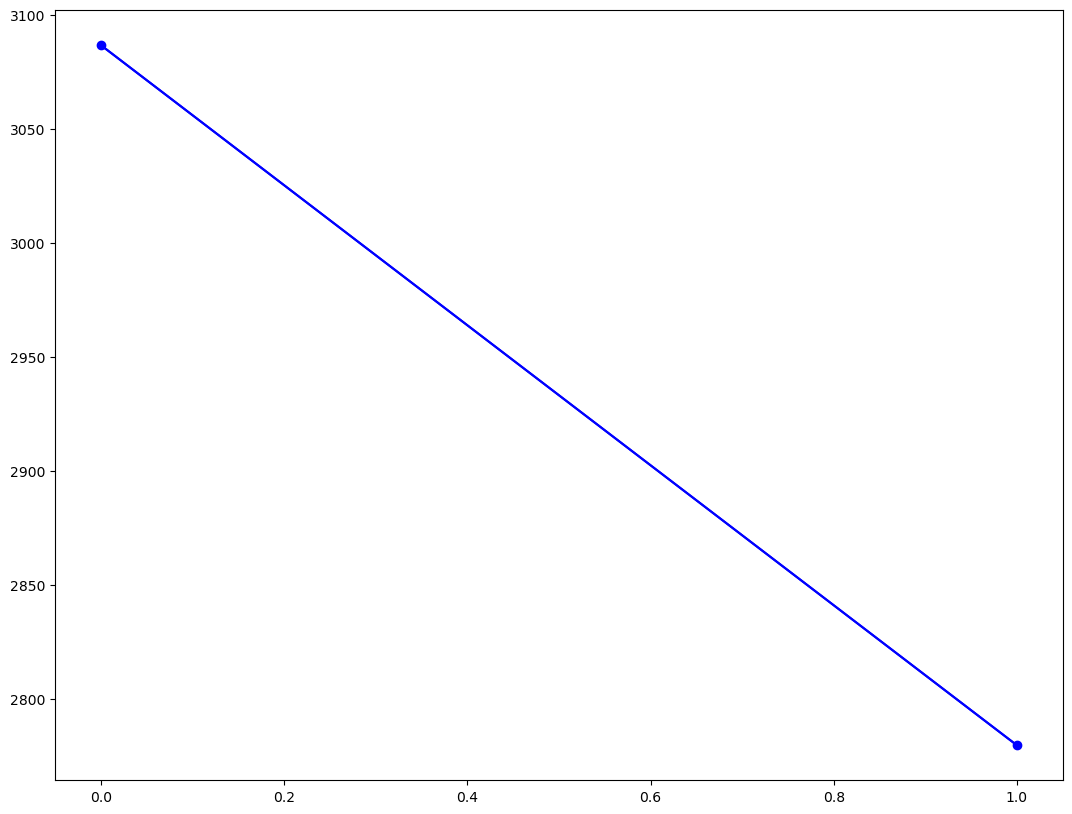

In [124]:
col_list = ['Instagram Web','Instagram app']
delta_battery_avg = np.mean(np.array(delta_battery).T[-2:],1)
battery_avg = np.mean(np.array(battery).T[-2:],1)
odpm_total_avg = np.mean(np.array(odpm_total).T[-2:],1)
modem_avg = np.mean(np.array(modem).T[-2:],1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = col_list
plt.rcParams['figure.figsize'] = [13, 10]
plt.plot(battery_avg,color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue')
plt.plot(odpm_total_avg,color='purple',linestyle='-',marker='>',label='Total power (ODPM)')
plt.errorbar(range(len(legend_list)),odpm_total_avg,yerr=np.std(np.array(odpm_total).T,1),color='purple')
plt.plot(range(1,len(legend_list)),delta_battery_avg,color='orange',linestyle='-',marker='o',label =  'Battery power difference')
plt.errorbar(range(1,len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange')
plt.plot(modem_avg,color='salmon',linestyle='-',marker='o',label = 'Modem+RFE power (OPDM)')
plt.errorbar(range(len(legend_list)),modem_avg,yerr=np.std(np.array(modem).T,1),color='salmon')
plt.legend()
plt.title('Avg powers ') 
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

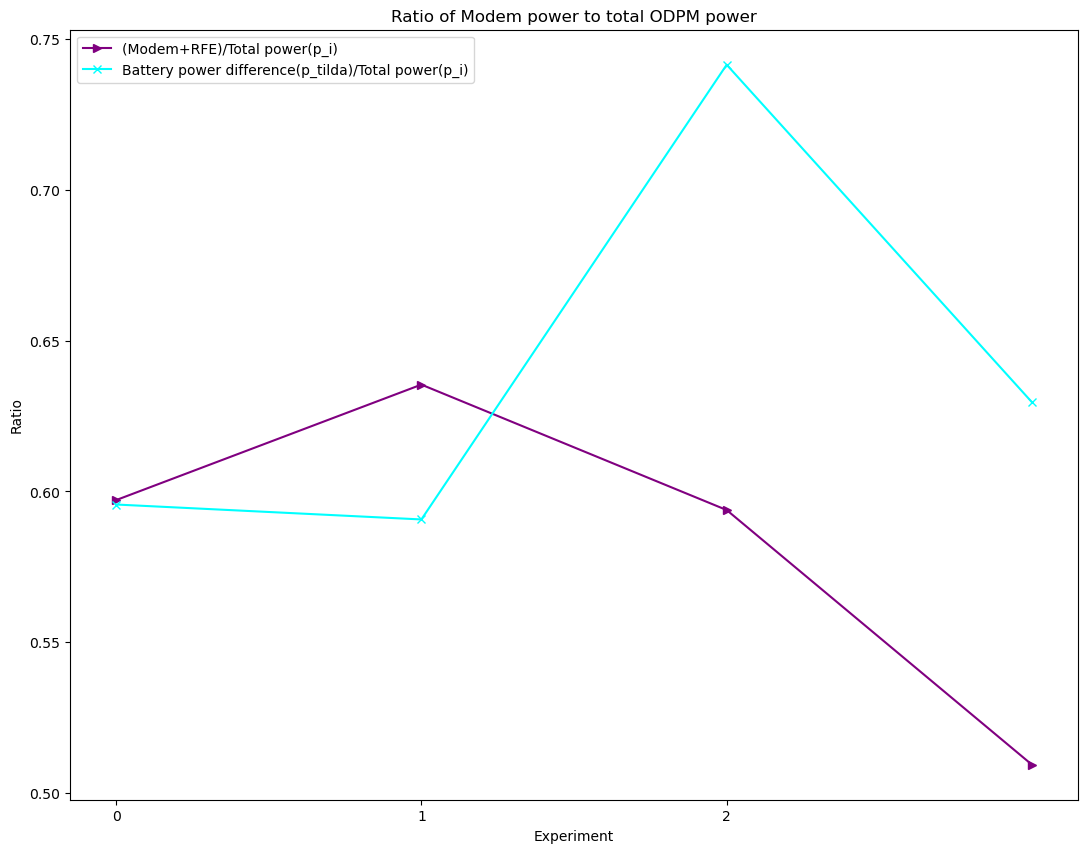

In [98]:
#2nd fig.
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = col_list[1:]
plt.rcParams['figure.figsize'] = [13, 10]
# plt.plot(np.mean(pct_battery,0),color='blue',linestyle='-',marker='o',label = 'Battery power difference/(Modem+RFE)')
# plt.errorbar(range(5),battery_avg,yerr=np.std(battery,1),color='blue')
plt.plot(np.mean(pct_cell,0),color='purple',linestyle='-',marker='>',label='(Modem+RFE)/Total power(p_i)')
plt.plot(np.mean(pct_p_tilda_pi,0),color='cyan',linestyle='-',marker='x',label='Battery power difference(p_tilda)/Total power(p_i)')

# plt.errorbar(range(5),odpm_total_avg,yerr=np.std(odpm_total,1),color='purple')
# plt.errorbar(range(5),battery_avg,yerr=np.std(battery,1),color='blue')
# plt.plot(modem_avg,color='green',linestyle='-',marker='x',label='Modem Power')
plt.legend()
plt.title('Ratio of Modem power to total ODPM power') 
plt.xlabel('Experiment')
plt.ylabel('Ratio')
plt.xticks(range(0,3),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
plt.ylim([0,1])

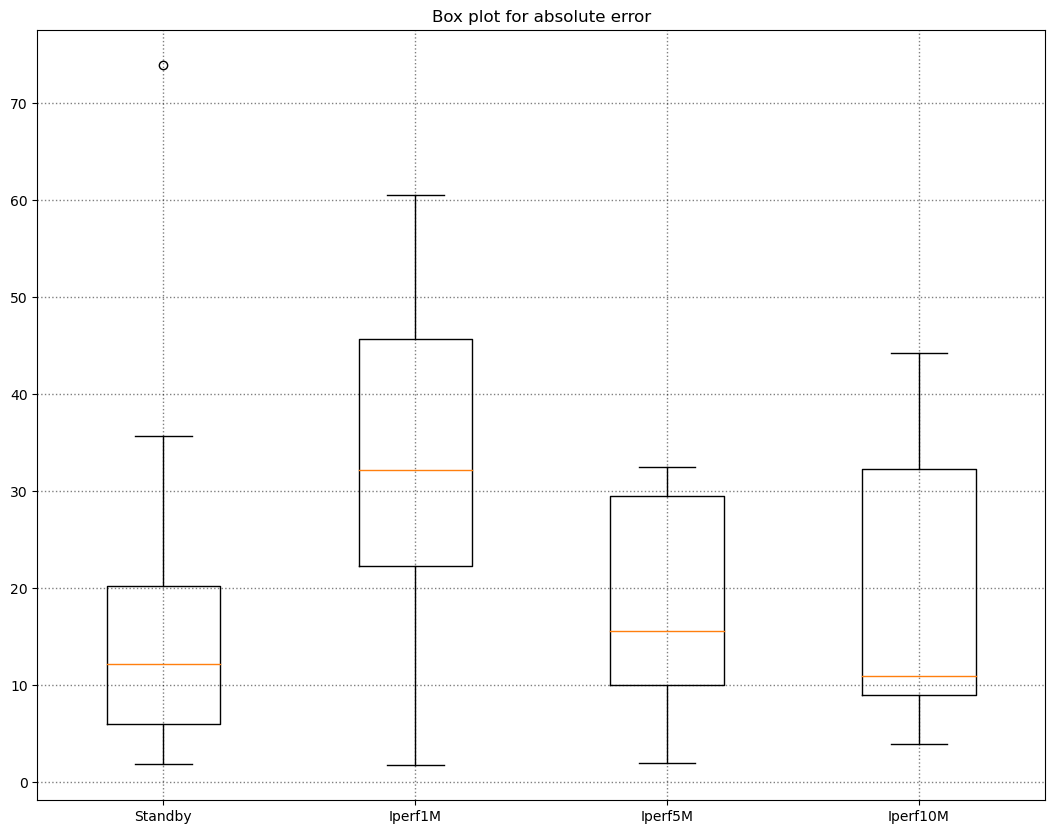

In [74]:
plt.rcParams['figure.figsize'] = [13, 10]
plt.boxplot(battery_error)
plt.title('Box plot for absolute error') 
plt.xticks(range(1,5),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)

In [ ]:
tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_3_no_charge_airplane1.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_3_no_charge_stdby1.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_3_no_charge_iperf0.perfetto-trace')) #10-15 dBm
num_tps = len(tp_list)
id_mapper = [27]+list(range(1,25))
# string_mapper = ["Battery charge","Battery capacity pct","Battery current","Battery avg current","Modem","RFE","mmWave","Display"]

df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
               .as_pandas_dataframe().replace(np.nan,0)
               .values.tolist() for i in id_mapper] for tp in tp_list]
[b1,b2,m1,m2,t1,t2] = get_powers(num_tps,df_list_cleaned)


Plotting all powers for different modes

Plotting difference in powers across different modes

In [ ]:
delta_battery1= (np.mean(battery_power[1])-np.mean(battery_power[0]))
delta_total1= (np.mean(total_power[1])-np.mean(total_power[0]))*4/1000
delta_modem1 = (np.mean(modem_power[1])-np.mean(modem_power[0]))*4/1000
delta_rfe1 = (np.mean(rfe_power[1])-np.mean(rfe_power[0]))*4/1000

delta_battery2= (np.mean(battery_power[2])-np.mean(battery_power[0]))
delta_total2= (np.mean(total_power[2])-np.mean(total_power[0]))*4/1000
delta_modem2 = (np.mean(modem_power[2])-np.mean(modem_power[0]))*4/1000
delta_rfe2 = (np.mean(rfe_power[2])-np.mean(rfe_power[0]))*4/1000

In [ ]:
'''Plots'''
plt.rcParams['figure.figsize'] = [13, 10]
plt.subplot(2,1,1)
# plt.plot(x_vals,delta_total1,label='Total power(OPDM)',color='blue')
avg = np.mean(delta_battery1)
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Battery power : '+str(avg),color='blue')

avg = np.mean(delta_total1)
plt.plot([x_vals[0],x_vals[-1]],[delta_total1,delta_total1],linestyle='--',label='Avg Total power : '+str(avg),color='purple')
avg = np.mean(delta_modem1)
# plt.plot(x_vals,delta_modem1,label='Modem power',color='green')
plt.plot([x_vals[0],x_vals[-1]],[delta_modem1,delta_modem1],linestyle='--',label='Avg modem power : '+str(avg),color='green')

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Power (mW)", fontsize=16)
plt.title("Total power vs Modem power difference between standby and airplane")
plt.legend(fontsize=10)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.minorticks_on()

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.subplot(2,1,2)
# plt.plot(x_vals,delta_total2,label='Total power(OPDM)',color='blue')
avg = np.mean(delta_battery2)
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Battery power : '+str(avg),color='blue')
avg = np.mean(delta_total2)
plt.plot([x_vals[0],x_vals[-1]],[delta_total2,delta_total2],linestyle='--',label='Avg Total power : '+str(avg),color='purple')
avg = np.mean(delta_modem2)
# plt.plot(x_vals,delta_modem2,label='Modem power',color='green')
plt.plot([x_vals[0],x_vals[-1]],[delta_modem2,delta_modem2],linestyle='--',label='Avg Modem power : '+str(avg),color='green')
avg = np.mean(delta_rfe2)
# plt.plot([x_vals[0],x_vals[-1]],[delta_rfe2,delta_rfe2],linestyle='--',label='Avg rfe power : '+str(avg),color='teal')

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Power (mW)", fontsize=16)
plt.title("Total power vs Modem power difference between iperf and airplane")
plt.legend(fontsize=10)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.minorticks_on()

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
# plt.ylim([0,2150])
# print(total_power)

Add all powers for different modes into a data frame and view

In [ ]:
tp = TraceProcessor(trace='../Perfetto_traces/5_2_battery_trial.perfetto-trace') #10-15 dBm

# print(tp)
# select ts, t.name, value from counter as c left join counter_track t on c.track_id = t.i
qr_it = tp.query('SELECT ts,t.name,value,track_id FROM counter as c LEFT JOIN counter_track t ON c.track_id=t.id')
# print(qr_it)
qr_it_pandas = qr_it.as_pandas_dataframe()
names = qr_it_pandas[16:40].name
all_powers.columns = ['Airplane','Standby','Iperf']
all_powers_diff=all_powers.assign(Airplane_to_stdby = all_powers.Standby -all_powers.Airplane)
all_powers_diff = all_powers_diff.assign(Airplane_to_iperf = all_powers.Iperf -all_powers.Airplane)
all_powers_diff.set_index(names,inplace=True)
display(all_powers_diff)

In [ ]:
delta_battery1= ((battery_power[1])-(battery_power[0]))
delta_total1= ((total_power[1])-(total_power[0]))*4/1000
delta_modem1 = ((modem_power[1])-(modem_power[0]))*4/1000
delta_rfe1 = ((rfe_power[1])-(rfe_power[0]))*4/1000

delta_battery2= ((battery_power[2])-(battery_power[0]))
delta_total2= ((total_power[2])-(total_power[0]))*4/1000
delta_modem2 = ((modem_power[2])-(modem_power[0]))*4/1000
delta_rfe2 = ((rfe_power[2])-(rfe_power[0]))*4/1000
plt.rcParams['figure.figsize'] = [13, 10]
plt.subplot(2,1,1)
plt.plot(x_vals[0:len(battery_power[1,:])],delta_battery1,label='Total power(OPDM)',color='blue')
avg = np.mean(delta_battery1)
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Battery power : '+str(avg),color='blue')

plt.plot(x_vals[0:len(total_power[1,:])],delta_total1,label='Total power(OPDM)',color='purple')
avg = np.mean(delta_total1)
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Total power : '+str(avg),color='purple')
avg = np.mean(delta_modem1+delta_rfe1)
plt.plot(x_vals,delta_modem1+delta_rfe1,label='Modem power',color='green')
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg modem + RFE power : '+str(avg),color='green')

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Power (mW)", fontsize=16)
plt.title("Total power vs Modem power difference between standby and airplane")
plt.legend(fontsize=10)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.minorticks_on()

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.subplot(2,1,2)
plt.plot(x_vals[0:len(battery_power[1,:])],delta_battery2,label='Total power(OPDM)',color='blue')
avg = np.mean(delta_battery2)
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Battery power : '+str(avg),color='blue')
plt.plot(x_vals[0:len(total_power[1,:])],delta_total2,label='Total power(OPDM)',color='purple')
avg = np.mean(delta_total2)
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Total power : '+str(avg),color='purple')
avg = np.mean(delta_modem2+delta_rfe2)
plt.plot(x_vals,delta_modem2+delta_rfe2,label='Modem power',color='green')
plt.plot([x_vals[0],x_vals[-1]],[avg,avg],linestyle='--',label='Avg Modem +RFE power : '+str(avg),color='green')
avg = np.mean(delta_rfe2)
# plt.plot([x_vals[0],x_vals[-1]],[delta_rfe2,delta_rfe2],linestyle='--',label='Avg rfe power : '+str(avg),color='teal')

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Power (mW)", fontsize=16)
plt.title("Total power vs Modem power difference between iperf and airplane")
plt.legend(fontsize=10)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.minorticks_on()

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
# plt.ylim([0,2150])
# print(total_power)

In [ ]:
df_np = np.array(df_list_cleaned)
curr_mode0 = df_np[0,2,:,1]
curr_mode1 = df_np[1,2,:,1]
curr_mode2 = df_np[2,2,:,1]

mdm_pwr0 = (df_np[0,4,1:,1] - df_np[0,4,0:-1,1])*4/1000
mdm_pwr1 = (df_np[1,4,1:,1] - df_np[1,4,0:-1,1])*4/1000
mdm_pwr2 = (df_np[2,4,1:,1] - df_np[2,4,0:-1,1])*4/1000
mdm_pwr_diff1 = (mdm_pwr1-mdm_pwr0)
mdm_pwr_diff2 = (mdm_pwr2-mdm_pwr1)

battery_power1 =3.7*(curr_mode1-curr_mode0)*10**(-3)
battery_power2 = 3.7*(curr_mode2-curr_mode1)*10**(-3)
x_vals = df_np[0,2,:,0];
plt.rcParams['figure.figsize'] = [13, 10]

plt.subplot(1,2,1)
# *4 because power measurements done roughly over 250ms (1/4 seconds) interval
plt.plot(x_vals,battery_power1, color = 'blue',
         label="Battery power diff stdby-airp")
min_time = np.min(x_vals[initial_offset:])
max_time = np.max(x_vals[initial_offset:])
plt.plot([min_time,max_time],[np.mean(battery_power1),np.mean(battery_power1)],color='blue', linestyle="--", label = "Avg Pow: "+str(np.mean(battery_power1))+ " mW")
plt.plot(x_vals,battery_power2,color='teal',label="Battery power diff iperf-stdby")
plt.plot([min_time,max_time],[np.mean(battery_power2),np.mean(battery_power2)],color='teal', linestyle="--", label = "Avg Pow: "+str(np.mean(battery_power2))+ " mW")
plt.plot(x_vals[1:],mdm_pwr_diff1,color= 'salmon',label="Modem power diff stdby-airp")
plt.plot([min_time,max_time],[np.mean(mdm_pwr_diff1),np.mean(mdm_pwr_diff1)],color='salmon', linestyle="--", label = "Avg Pow: "+str(np.mean(mdm_pwr_diff1))+ " mW")
plt.plot(x_vals[1:],mdm_pwr_diff2,color='orange',label="Modem power diff iperf-stdby")
plt.plot([min_time,max_time],[np.mean(mdm_pwr_diff2),np.mean(mdm_pwr_diff2)], color='orange',linestyle="--", label = "Avg Pow: "+str(np.mean(mdm_pwr_diff2))+ " mW")

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Power (mW)", fontsize=16)
plt.title('Modem')
plt.legend(fontsize=10)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.minorticks_on()

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.ylim([0,2150])
# print(np.mean(curr_mode1**2-curr_mode0**2)*10**(-6),mdm_pwr_diff1)
# print(np.mean(curr_mode2**2-curr_mode1**2)*10**(-6),mdm_pwr_diff2)

In [ ]:
df_np = np.array(df_list_cleaned[tp_idx])
df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
#     df_np[:,:,:,0] = df_np[:,:,:,0] - np.tile(df_np[:,:,0,0],[df_np.shape[2],1,1]).transpose(1,2,0) 
df_np[:,:,0] = df_np[:,:,0]/1e9

i =3
x_vals = df_np[i-1,:,0]
y_vals = df_np[i-1,:,1]
delta_y_vals = np.copy(y_vals)
delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
delta_y_vals[0] = 0
print(y_vals)
# avg_pow_indiv = np.mean(delta_y_vals[initial_offset:])
# print("Average for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv))
# #         plt.subplot(2,2,i)
# fig1.add_trace(go.Scatter(x=x_vals[initial_offset:],y=delay_y_vals[initial_offset:],
#                       line_color= color_list[tp_idx],name=legend_list[tp_idx],
#                     legendgroup=tp_idx,showlegend=(i==1)),row=int((i+1)/2),col=(i-1)%2+1)
# fig1.add_trace(go.Scatter(x=[min_time,max_time],y=[avg_pow_indiv,avg_pow_indiv],
#                      mode='lines', line={'dash': 'dash', 'color': color_list[tp_idx]},name="Avg of "+str(string_mapper[i-1])+": "+str(avg_pow_indiv.round(2)) ,
#                      legendgroup=tp_idx),row=int((i+1)/2),col=(i-1)%2+1)

# min_time = np.min(x_vals[initial_offset:])
# max_time = np.max(x_vals[initial_offset:])

In [ ]:
## plotly plots
color_list = ['blue','green','teal','pink','salmon','blue','green','teal','pink','salmon']
# legend_list = ["Random schedule for 60s", "MIMO ","Standby"]
legend_list = ["Airplane","Standby","Iperf"]
legend_list2 = ["Charge","Capacity(%)","Current","Avg current","Modem","RFE","mmWave","Display"]
# legend_list = ["Brightness - 35%","Brightness - 70%","Brightness - 100%","Reading3","Standby_to_airplane","Standby"]
# legend_list = ["Standby to Wifi","Wifi Alone","Airplane alone","Standby"]

# string_mapper_AS = ["Cellular (Total)","Display"]
initial_offset = 2
# end_offset = 72
fig1 = make_subplots(rows=2,cols=2,subplot_titles=("Charge","Capacity(%)","Current","Avg current"),column_widths=[1,1],row_heights=[1,1])
fig2 = make_subplots(rows=2,cols=2,subplot_titles=("Modem","RFE","mmWave","Display"),column_widths=[1,1],row_heights=[1,1])

for tp_idx in range(num_tps):
    df_np = np.array(df_list_cleaned[tp_idx])
    df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
#     df_np[:,:,:,0] = df_np[:,:,:,0] - np.tile(df_np[:,:,0,0],[df_np.shape[2],1,1]).transpose(1,2,0) 
    df_np[:,:,0] = df_np[:,:,0]/1e9
    
    for i in range(1,5):
        x_vals = df_np[i-1,:,0]
        y_vals = df_np[i-1,:,1]
#         x_vals = x_vals[:min(x_vals.size,end_offset)]
#         y_vals = y_vals[:min(y_vals.size,end_offset)]
        delta_y_vals = np.copy(y_vals)
        delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
        delta_y_vals[0] = 0
        avg_pow_indiv = np.mean(3.7*10**(-3)*(abs(y_vals[initial_offset:])))
        print("Average Power "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
#         plt.subplot(2,2,i)
        fig1.add_trace(go.Scatter(x=x_vals[initial_offset:],y=3.7*10**(-3)*(abs(y_vals[initial_offset:])),
                              line_color= color_list[tp_idx],name=legend_list[tp_idx],
                            legendgroup=tp_idx,showlegend=(i==1)),row=int((i+1)/2),col=(i-1)%2+1)
    
        min_time = np.min(x_vals[initial_offset:])
        max_time = np.max(x_vals[initial_offset:])
        fig1.add_trace(go.Scatter(x=[min_time,max_time],y=[avg_pow_indiv,avg_pow_indiv],
                             mode='lines', line={'dash': 'dash', 'color': color_list[tp_idx]},name="Avg of "+str(string_mapper[i-1])+": "+str(avg_pow_indiv.round(2)) ,
                             legendgroup=tp_idx),row=int((i+1)/2),col=(i-1)%2+1)

        
    for i in range(5,9):
        x_vals = df_np[i-1,:,0]
        y_vals = df_np[i-1,:,1]

#         x_vals = x_vals[:min(x_vals.size,end_offset)]
#         y_vals = y_vals[:min(y_vals.size,end_offset)]
        delta_y_vals = np.copy(y_vals)
        delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
        delta_y_vals[0] = 0
        avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
        print("Average Power (mW) for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
#         plt.subplot(2,2,i) 
        fig1.add_trace(go.Scatter(x=x_vals[initial_offset:],y=delta_y_vals[initial_offset:]*(4/1000),
                              line_color= color_list[i],name=legend_list[tp_idx]+" - " + legend_list2[i-1],
                            legendgroup=tp_idx,showlegend=True),row=int(2),col=(1))
        fig1.add_trace(go.Scatter(x=[min_time,max_time],y=[avg_pow_indiv,avg_pow_indiv],
             mode='lines', line={'dash': 'dash', 'color': color_list[i]},name="Avg Pow of "+str(string_mapper[i-1])+": "+str(avg_pow_indiv.round(2))+ " mW",
             legendgroup=tp_idx),row=int(2),col=(2))
        # *4 because power measurements done roughly over 250ms (1/4 seconds) interval
#         plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000), 
#                  color=color_list[tp_idx],linewidth=2, linestyle=line_list[tp_idx], label=legend_list[tp_idx])
        min_time = np.min(x_vals[initial_offset:])
        max_time = np.max(x_vals[initial_offset:])
#         fig.add_trace(go.Scatter(x=[min_time,max_time],y=[avg_pow_indiv,avg_pow_indiv],
#                                  mode='lines', line={'dash': 'dash', 'color': color_list[tp_idx]},name="Avg Pow of "+str(string_mapper[i-1])+": "+str(avg_pow_indiv.round(2))+ " mW",
#                                  legendgroup=tp_idx),row=int((i+1)/2),col=(i-1)%2+1)
#         fig.add_annotation(xref="x domain", yref="y domain",
#                   x=1, y=1,text="Avg Pow: "+str(avg_pow_indiv.round(2))+ " mW",showarrow=True)
#         plt.xlabel("Time (seconds)", fontsize=12)
#         plt.ylabel("Power (mW)", fontsize=16)
#         plt.legend(fontsize=10)
        # plt.title('Ratio vs #femto BS')
#         plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
#         plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
#         plt.minorticks_on()
        
#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=14)
fig1.update_xaxes(title='Time')
fig1.update_yaxes(range=[-10,6050],title='Power')
fig1.update_layout(height=800, width=1.3*800, 
                  title=dict(text="Power consumption of UE with iperf&sleep", font=dict(size=15)),
                  showlegend=enable_legend)

fig1.show()
fig2.update_xaxes(title='Time')
fig2.update_yaxes(range=[0,2150],title='Power')
fig2.update_layout(height=800, width=1.3*800, 
                  title=dict(text="Power consumption of UE with iperf&sleep", font=dict(size=15)),
                  showlegend=enable_legend)

fig2.show()
# fig_name = "random_sched"
# fig.write_html("./"+fig_name+".html")

In [ ]:
initial_offset


In [ ]:
## normal plots matplotlib
# string_mapper_AS = ["Cellular (Total)","Display"]
plt.rcParams['figure.figsize'] = [13, 10]
# color_list = ['red','orange','yellow']
color_list = ['green','orange','red','salmon']

legend_list = ["Youtube Loc1","Youtube Loc2","Youtube Loc3"]
legend_list = ["Display off","Reading 1","Reading 2","Reading3","Standby"]
legend_list = ["Brightness - 35%","Brightness - 70%","Brightness - 100%","Reading3","Standby_to_airplane","Standby"]

initial_offset = 2
# end_offset = 72
for tp_idx in range(num_tps):
    df_np = np.array(df_list_cleaned[tp_idx])
    df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
#     df_np[:,:,:,0] = df_np[:,:,:,0] - np.tile(df_np[:,:,0,0],[df_np.shape[2],1,1]).transpose(1,2,0) 
    df_np[:,:,0] = df_np[:,:,0]/1e9
    
    for i in range(1,5):
        x_vals = df_np[i-1,:,0]
        y_vals = df_np[i-1,:,1]
#         x_vals = x_vals[:min(x_vals.size,end_offset)]
#         y_vals = y_vals[:min(y_vals.size,end_offset)]
        delta_y_vals = np.copy(y_vals)
        delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
        delta_y_vals[0] = 0
#         avg_pow_indiv = np.max(delta_y_vals[initial_offset:]*(4/1000))
        avg_pow_indiv = np.mean(delta_y_vals[120:240]*4/1000)

        print("Peak Power (mW) for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
        plt.subplot(2,2,i)
        # *4 because power measurements done roughly over 250ms (1/4 seconds) interval
        plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000), 
                 color=color_list[tp_idx],linewidth=2, linestyle=line_list[tp_idx], label=legend_list[tp_idx])
        min_time = np.min(x_vals[initial_offset:])
        max_time = np.max(x_vals[initial_offset:])
        plt.plot([min_time,max_time],[avg_pow_indiv,avg_pow_indiv], linestyle="--", color=color_list[tp_idx], label = "Peak Pow: "+str(avg_pow_indiv.round(2))+ " mW")
        plt.xlabel("Time (seconds)", fontsize=12)
        plt.ylabel("Power (mW)", fontsize=16)
        plt.title(string_mapper[i-1])
        plt.legend(fontsize=10)
        # plt.title('Ratio vs #femto BS')
        plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
        plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
        plt.minorticks_on()
        
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=14)
        plt.ylim([0,2150])
        if(enable_legend):
            plt.legend()

plt.suptitle('Power consumption comparison between 3 locations')
# plt.suptitle("Delta Values, can be checked with Android Studio")
# plt.savefig("./5G.pdf")

In [ ]:
## plotly colors 
'''
 aliceblue, antiquewhite, aqua, aquamarine, azure,
                beige, bisque, black, blanchedalmond, blue,
                blueviolet, brown, burlywood, cadetblue,
                chartreuse, chocolate, coral, cornflowerblue,
                cornsilk, crimson, cyan, darkblue, darkcyan,
                darkgoldenrod, darkgray, darkgrey, darkgreen,
                darkkhaki, darkmagenta, darkolivegreen, darkorange,
                darkorchid, darkred, darksalmon, darkseagreen,
                darkslateblue, darkslategray, darkslategrey,
                darkturquoise, darkviolet, deeppink, deepskyblue,
                dimgray, dimgrey, dodgerblue, firebrick,
                floralwhite, forestgreen, fuchsia, gainsboro,
                ghostwhite, gold, goldenrod, gray, grey, green,
                greenyellow, honeydew, hotpink, indianred, indigo,
                ivory, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                lightskyblue, lightslategray, lightslategrey,
                lightsteelblue, lightyellow, lime, limegreen,
                linen, magenta, maroon, mediumaquamarine,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                mediumturquoise, mediumvioletred, midnightblue,
                mintcream, mistyrose, moccasin, navajowhite, navy,
                oldlace, olive, olivedrab, orange, orangered,
                orchid, palegoldenrod, palegreen, paleturquoise,
                palevioletred, papayawhip, peachpuff, peru, pink,
                plum, powderblue, purple, red, rosybrown,
                royalblue, saddlebrown, salmon, sandybrown,
                seagreen, seashell, sienna, silver, skyblue,
                slateblue, slategray, slategrey, snow, springgreen,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat, white, whitesmoke, yellow,
                yellowgreen
                '''